In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# plt.style.use('ggplot')
plt.rcdefaults()
plt.style.use('seaborn-darkgrid')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## $\color{red}{\text{Edit hena ya mark }}$

In [5]:
age_gender = pd.read_csv('age_gender_bkts.csv')
# countries = pd.read_csv('countries.csv')
#sample_sub = pd.read_csv('sample_submission_NDF.csv')
#sessions = pd.read_csv('sessions.csv')
#test = pd.read_csv('test_users.csv')
#train = pd.read_csv('train_users_2.csv')

In [6]:
age_gender.drop(['year'], axis=1, inplace=True)

In [8]:
age_gender.columns

Index(['age_bucket', 'country_destination', 'gender',
       'population_in_thousands'],
      dtype='object')

In [7]:
Countries = age_gender.country_destination.unique()

'AU'

In [14]:
gender = 'male'
destination = 'AU'

age_dict = {
    '100+': 20,
    '95-99': 19,
    '90-94': 18,
    '85-89': 17,
    '80-84': 16,
    '75-79': 15,
    '70-74': 14,
    '65-69': 13,
    '60-64': 12,
    '55-59': 11,
    '50-54': 10,
    '45-49': 9,
    '40-44': 8,
    '35-39': 7,
    '30-34': 6,
    '25-29': 5,
    '20-24': 4,
    '15-19': 3,
    '10-14': 2,
    '5-9': 1,
    '0-4': 0
}


cond1 = age_gender['gender'] == gender
cond2 = age_gender['country_destination'] == destination
df1 = age_gender[cond1 & cond2]

age_values = pd.DataFrame(age_dict.keys(), columns=['age_bucket'])
age_values['values'] = age_dict.values()

df1 = df1.merge(age_values, on='age_bucket', how='inner')
df1.sort_values(by='values', ascending=True, inplace=True)



NameError: name 'df1' is not defined

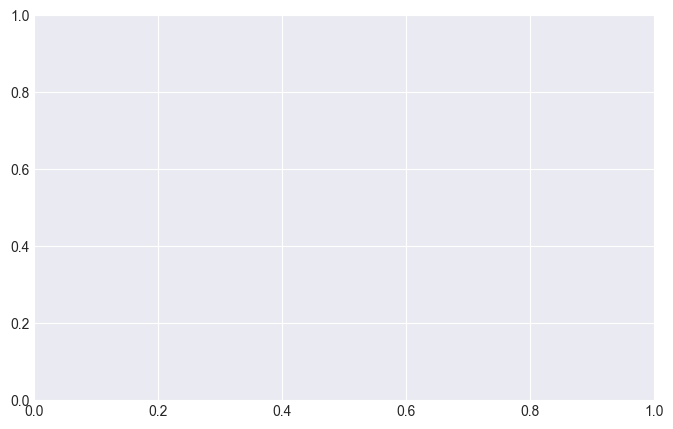

In [28]:
# plt.rcParams.update({'font.family':'fantasy'})
fig, ax = plt.subplots(figsize=(8, 5))

bars = plt.bar(
    x=df1['values']*2,
    height=df1['population_in_thousands'],
    width=1.3,
)

plt.xticks(df1['values']*2, df1['age_bucket'])

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_fontsize(10)
    item.set_rotation(45)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

bar_color = bars[0].get_facecolor()


for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + bar.get_height()/100,
        int(round(bar.get_height(), 0)),
        horizontalalignment='center',
        color=bar_color,
        fontsize=9,
        weight='bold'
    )

ax.set(facecolor='lightgray')
fig.set(facecolor='lightgray')

plt.grid(axis='x', visible=False)
ax.get_yaxis().set_ticks([])
fig.tight_layout()
ax.margins(x=0.01)
ax.margins(y=0.005)

#plt.legend(['Population'], loc='best', fontsize=10)

plt.title("Flights of {}s to {}".format(gender,destination), fontsize=23, pad=35)
plt.xlabel('Age Bucket', fontsize=17,)
plt.ylabel('Population in Thousands', fontsize=17,)
plt.show()

In [18]:
countries_dict = {
    'PT': 'Portugal',
    'NL' : 'Netherlands',
    'AU' : 'Australia',
    'CA' : 'Canada',
    'ES' : 'Spain',
    'IT' : 'Italy',
    'GB' : 'United Kingdom',
    'FR' : 'France',
    'DE' : 'Germany',
    'US' : 'United States',
}



list(countries_dict.keys())[list(countries_dict.values()).index('Portugal')]

['PT', 'NL', 'AU', 'CA', 'ES', 'IT', 'GB', 'FR', 'DE', 'US']

In [27]:
list(countries_dict.values()).index('Portugal')

0

In [7]:


plt.figure(figsize=(10,8))

plt.bar(x=df1['age_bucket'], height= df1['population_in_thousands'], width=0.5,)
plt.xlabel('Age Bucket')
plt.ylabel('Population in Thousands')

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)  # * rotate 45 degrees
plt.subplots_adjust(bottom=0.25)  # * adjust bottom margin


<IPython.core.display.Javascript object>

In [17]:
df1["population_in_thousands"].mean()

566.6190476190476

Text(0, 0.5, 'Population in Thousands')

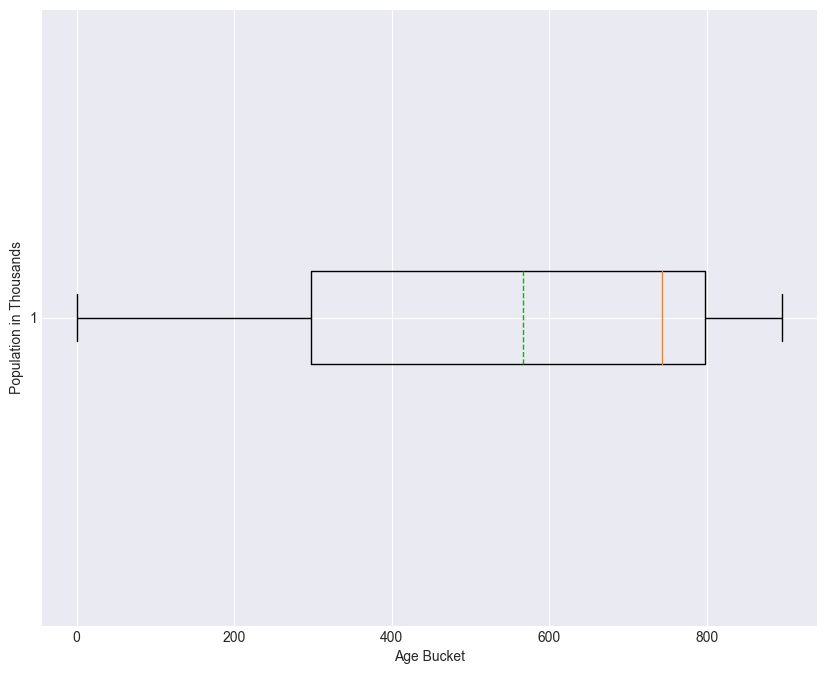

In [18]:
plt.figure(figsize=(10, 8))
plt.boxplot(df1['population_in_thousands'],
            sym='+', vert=False, autorange=True,
            manage_ticks=True, patch_artist=False,
            meanline=True, showmeans=True)
# plt.legend(['Mean', 'Median'])
#plt.legend([df1["population_in_thousands"].mean(), df1["population_in_thousands"].median(), ['Mean', 'Median']], loc='upper right')


plt.xlabel('Age Bucket')
plt.ylabel('Population in Thousands')


In [10]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

<IPython.core.display.Javascript object>

In [11]:
countries = pd.read_csv('countries.csv')

In [12]:
countries


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [13]:
age_gender.groupby('age_bucket')['population_in_thousands'].sum()

age_bucket
0-4      42786.0
10-14    42244.0
100+       175.0
15-19    43347.0
20-24    46083.0
25-29    47721.0
30-34    48408.0
35-39    47254.0
40-44    49170.0
45-49    51864.0
5-9      42477.0
50-54    53015.0
55-59    48882.0
60-64    43427.0
65-69    38196.0
70-74    29286.0
75-79    23704.0
80-84    17081.0
85-89    10962.0
90-94     4951.0
95-99     1083.0
Name: population_in_thousands, dtype: float64

In [14]:
age_gender.groupby('gender')['age_bucket'].count().plot(kind='bar')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='gender'>

In [15]:
sessions.shape

NameError: name 'sessions' is not defined

In [ ]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [ ]:
print(len(age_gender['population_in_thousands'].unique()))
print(len(age_gender['population_in_thousands']))

381
420


In [ ]:
print(age_gender['age_bucket'].unique())
print(age_gender['country_destination'].unique())
print(age_gender['gender'].unique())
# print(age_gender['population_in_thousands'].unique())
print(age_gender['year'].astype(int).unique())

['100+' '95-99' '90-94' '85-89' '80-84' '75-79' '70-74' '65-69' '60-64'
 '55-59' '50-54' '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19'
 '10-14' '5-9' '0-4']
['AU' 'CA' 'DE' 'ES' 'FR' 'GB' 'IT' 'NL' 'PT' 'US']
['male' 'female']
[2015]


## insights 
- Year is redundant column , all were in 2015
- use any other column witht the pop to print 

In [ ]:
countries = pd.read_csv('countries.csv')

countries
    

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,Australia,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,Canada,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,Germany,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,Spain,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,France,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,United Kingdom,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,Italy,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,Netherlands,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,Portugal,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,United States,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [ ]:
countries_dict = {
    'PT': 'Portugal',
    'NL' : 'Netherlands',
    'AU' : 'Australia',
    'CA' : 'Canada',
    'ES' : 'Spain',
    'IT' : 'Italy',
    'GB' : 'United Kingdom',
    'FR' : 'France',
    'DE' : 'Germany',
    'US' : 'United States',
}
countries = pd.read_csv('countries.csv')
countries = countries.drop(['lat_destination','lng_destination','destination_km2'], axis=1)
population = age_gender.groupby('country_destination')['population_in_thousands'].sum().reset_index()
countries = countries.merge(population, on='country_destination', how='inner')
countries.drop([9], axis=0, inplace=True)
countries.rename(columns={'language_levenshtein_distance': 'Languade_diff'}, inplace=True)
countries.rename(columns={'destination_language ': 'destination_language'}, inplace=True)
countries['country_destination'] = countries['country_destination'].map(countries_dict)
# countries.sort_values(by='population_in_thousands', ascending=False, inplace=True)
countries.reset_index(drop=True, inplace=True)
countries



,country_destination,distance_km,destination_language,Languade_diff,population_in_thousands
0,Australia,15297.7440,eng,0.00,23923.0
1,Canada,2828.1333,eng,0.00,35871.0
2,Germany,7879.5680,deu,72.61,82562.0
3,Spain,7730.7240,spa,92.25,47203.0
4,France,7682.9450,fra,92.06,64983.0
5,United Kingdom,6883.6590,eng,0.00,63840.0
6,Italy,8636.6310,ita,89.40,61145.0
7,Netherlands,7524.3203,nld,63.22,16848.0
8,Portugal,7355.2534,por,95.45,10609.0


In [ ]:
countries.sort_values(by='population_in_thousands', ascending=False, inplace=True)
countries['Rank_by_Population'] = range(1, len(countries)+1)
countries.sort_values(by='distance_km', ascending=True, inplace=True)
countries['Rank_by_nearst'] = range(1, len(countries)+1)

countries

,country_destination,distance_km,destination_language,Languade_diff,population_in_thousands,Rank_by_nearst,Rank_by_Population
1,Canada,2828.1333,eng,0.00,35871.0,1,6
5,United Kingdom,6883.6590,eng,0.00,63840.0,2,3
8,Portugal,7355.2534,por,95.45,10609.0,3,9
7,Netherlands,7524.3203,nld,63.22,16848.0,4,8
4,France,7682.9450,fra,92.06,64983.0,5,2
3,Spain,7730.7240,spa,92.25,47203.0,6,5
2,Germany,7879.5680,deu,72.61,82562.0,7,1
6,Italy,8636.6310,ita,89.40,61145.0,8,4
0,Australia,15297.7440,eng,0.00,23923.0,9,7


In [ ]:
countries.sort_values(by='distance_km', ascending=True, inplace=True)
countries['Rank_by_nearst'] = range(1, len(countries)+1)
countries.sort_values(by='population_in_thousands', ascending=True, inplace=True)
countries['Rank_by_Population'] = range(1, len(countries)+1)

In [ ]:
test2 = countries.groupby('destination_language')[['population_in_thousands', 'Languade_diff']].sum(
).sort_values(by='population_in_thousands', ascending=False)
test2.sort_values(by='Languade_diff', ascending=True, inplace=True)
# test2['population_in_thousands'] = test2['population_in_thousands']/1000
test2

,population_in_thousands,Languade_diff
destination_language,,
eng,123634.0,0.00
nld,16848.0,63.22
deu,82562.0,72.61
ita,61145.0,89.40
fra,64983.0,92.06
spa,47203.0,92.25
por,10609.0,95.45


In [ ]:
test2['Languade_diff'].dtype

dtype('float64')

In [ ]:
test2.corr()

,population_in_thousands,Languade_diff
population_in_thousands,1.000000,-0.693674
Languade_diff,-0.693674,1.000000


In [ ]:
test = countries.drop(['destination_language','Languade_diff'], axis=1)
test.set_index('country_destination', inplace=True)
test.sort_values(by='distance_km', ascending=True, inplace=True)
test = test[['distance_km','population_in_thousands']]
test

,distance_km,population_in_thousands
country_destination,,
Canada,2828.1333,35871.0
United Kingdom,6883.6590,63840.0
Portugal,7355.2534,10609.0
Netherlands,7524.3203,16848.0
France,7682.9450,64983.0
Spain,7730.7240,47203.0
Germany,7879.5680,82562.0
Italy,8636.6310,61145.0
Australia,15297.7440,23923.0


In [ ]:
test

,distance_km,population_in_thousands
country_destination,,
Canada,2828.1333,35871.0
United Kingdom,6883.6590,63840.0
Portugal,7355.2534,10609.0
Netherlands,7524.3203,16848.0
France,7682.9450,64983.0
Spain,7730.7240,47203.0
Germany,7879.5680,82562.0
Italy,8636.6310,61145.0
Australia,15297.7440,23923.0


In [ ]:
test2.set_index

,population_in_thousands,Languade_diff
destination_language,,
eng,123.634,0.00
nld,16.848,63.22
deu,82.562,72.61
ita,61.145,89.40
fra,64.983,92.06
spa,47.203,92.25
por,10.609,95.45


'-0.6936'

Text(0, 0.5, 'Difficulty-with-respect-to-English')

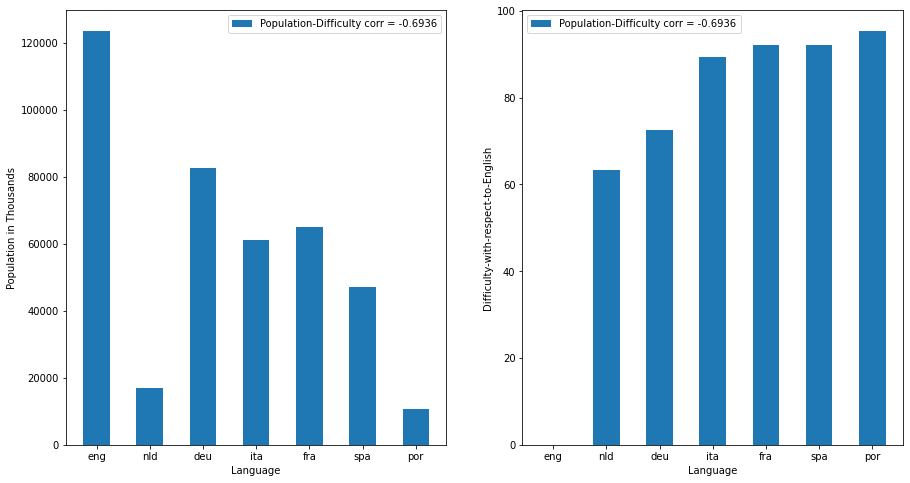

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)

plt.bar(x=test2.index, height= test2['population_in_thousands'], width=0.5,)
corr = test2.corr().iloc[0,1].astype(str)
plt.legend([f'Population-Difficulty corr = {corr[:7]}'])
plt.xlabel('Language')
plt.ylabel('Population in Thousands')


plt.subplot(1, 2, 2)
plt.bar(x=test2.index, height= test2['Languade_diff'], width=0.5,)

corr = test2.corr().iloc[0,1].astype(str)
plt.legend([f'Population-Difficulty corr = {corr[:7]}'])
plt.xlabel('Language')
plt.ylabel('Difficulty-with-respect-to-English')

Text(0, 0.5, 'Difficulty-with-respect-to-English')

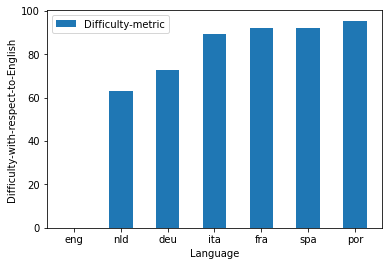

In [ ]:
plt.bar(x=test2.index, height= test2['Languade_diff'], width=0.5,)

corr = test2.corr().iloc[0,1].astype(str)
plt.legend([f'Population-Difficulty corr = {corr[:7]}'])
plt.xlabel('Language')
plt.ylabel('Difficulty-with-respect-to-English')

In [ ]:
sessions = pd.read_csv('sessions.csv')

In [ ]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
user = sessions['user_id'].unique()[1]
sessions[sessions['user_id'] == user]


,user_id,action,action_type,action_detail,device_type,secs_elapsed
127,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0
128,yo8nz8bqcq,create,submit,create_user,Mac Desktop,NaN
129,yo8nz8bqcq,confirm_email,click,confirm_email_link,Mac Desktop,115983.0
130,yo8nz8bqcq,show,view,p3,Mac Desktop,20285.0
131,yo8nz8bqcq,show_personalize,data,user_profile_content_update,Mac Desktop,3255.0
132,yo8nz8bqcq,show,view,user_profile,Mac Desktop,47308.0
133,yo8nz8bqcq,header_userpic,data,header_userpic,Mac Desktop,14156.0
134,yo8nz8bqcq,personalize,data,wishlist_content_update,Mac Desktop,36.0
135,yo8nz8bqcq,show,NaN,NaN,Mac Desktop,4080.0


In [ ]:
sessions['action_type'].unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

array([], dtype=object)

In [ ]:
len(sessions.device_type.unique())

14

## $\color{blue}{\text{Notes}}$
- lat_destination = $\color{green}{\text{latitude}}$
- lng_destination = $\color{green}{\text{longitude}}$
- ~~destination_km2~~ is $\color{red}{\text{redundant}}$ 
- $\color{yellow}{\text{levenshtein distance}}$ , In information theory, linguistics, and computer science, the Levenshtein distance is a string metric for measuring the difference between two sequences. Informally, the Levenshtein distance between two words is the minimum number of single-character edits required to change one word into the other.
- drop US row , as it doesn't have much information to the analysis, and will miss up the calculation of correlation
- 

$\color{yellow}{\text{levenshtein distance}}$

In [ ]:
sessions 

In [ ]:
sample_sub['country'].unique()

array(['NDF'], dtype=object)

In [ ]:
train.id.head(25)

0     gxn3p5htnn
1     820tgsjxq7
2     4ft3gnwmtx
3     bjjt8pjhuk
4     87mebub9p4
5     osr2jwljor
6     lsw9q7uk0j
7     0d01nltbrs
8     a1vcnhxeij
9     6uh8zyj2gn
10    yuuqmid2rp
11    om1ss59ys8
12    k6np330cm1
13    dy3rgx56cu
14    ju3h98ch3w
15    v4d5rl22px
16    2dwbwkx056
17    frhre329au
18    cxlg85pg1r
19    gdka1q5ktd
20    qdubonn3uk
21    qsibmuz9sx
22    80f7dwscrn
23    jha93x042q
24    7i49vnuav6
Name: id, dtype: object

In [ ]:
train[train.id == 'jha93x042q']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
22,80f7dwscrn,2010-01-11,20100111031438,2010-01-11,-unknown-,40.0,basic,0,en,seo,google,untracked,Web,iPhone,-unknown-,US


In [ ]:
sessions[sessions.user_id =='jha93x042q'].sort_values(by='action')

,user_id,action,action_type,action_detail,device_type,secs_elapsed


In [ ]:
sessions.rename(columns={'user_id': 'id'}, inplace=True)

In [ ]:
sessions.id.unique()

array(['d1mm9tcy42', 'yo8nz8bqcq', '4grx6yxeby', ..., 'fa6260ziny',
       '87k0fy4ugm', '9uqfg8txu3'], dtype=object)

In [ ]:
pd.merge(train.id, sessions.id, on='id')